In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

df = pd.read_csv('./data/dataset.csv')

# Make sure we loaded in the dataset.
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
0,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010563,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776810,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
1,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010534,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
2,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010505,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
3,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010476,NaN,1534777232,"{""requestParameters"": {""filterSet"": {""items"": ...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN
4,botsv3~307~F1874916-CBDC-4E45-BC0A-518E1190B08E,307:1010450,NaN,1534777232,"{""requestParameters"": {""securityGroupIdSet"": {...",aws:cloudtrail,1534776809,NaN,NaN,NaN,...,Boto/2.47.0 Python/2.7.14 Linux/4.4.0-1062-aws,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-west-1,NaN


In [2]:

# Timestamp data is displayed in epoch rather than a human readable time format.
# Let's convert it:

df['_time'] = pd.to_datetime(df['_time'], unit='s')
df['_indextime'] = pd.to_datetime(df['_indextime'], unit='s')
df = df.sort_values('_time')

# And check our conversion worked:
df.head()

,_bkt,_cd,_eventtype_color,_indextime,_raw,_sourcetype,_time,action,additionalEventData.LoginTo,additionalEventData.MFAUsed,...,user_agent,user_arn,user_group_id,user_id,user_role,user_type,vendor,vendor_account,vendor_region,vpcEndpointId
4577,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171332,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4575,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171388,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4576,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171360,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:54,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4578,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171304,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:01:56,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN
4574,botsv3~303~F1874916-CBDC-4E45-BC0A-518E1190B08E,303:171416,NaN,2018-08-20 09:09:19,"{""sourceIPAddress"": ""34.215.24.225"", ""eventTim...",aws:cloudtrail,2018-08-20 09:02:00,NaN,NaN,NaN,...,Boto3/1.5.22 Python/2.7.14 Linux/4.4.0-1062-aw...,arn:aws:iam::622676721278:user/splunk_access,6.230000e+11,AIDAIQDWHFKP2XVDXFKFW,NaN,IAMUser,Amazon Web Services,6.230000e+11,us-east-1,NaN


In [45]:
df_prime = df[['_time', 'sourceIPAddress', 'errorCode']]

df_prime.set_index('_time', inplace=True, drop=True)

df_prime.head()

,sourceIPAddress,errorCode
_time,,
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:54,34.215.24.225,success
2018-08-20 09:01:56,34.215.24.225,success
2018-08-20 09:02:00,34.215.24.225,success


In [49]:
# Create a multi index of time, sourceIPAddress, and errorCode
# then get the count of each unique index using size -> convert to frame
df_freq = df_prime.groupby(['_time', 'sourceIPAddress', 'errorCode']).size().to_frame()

# Rename the column to freqency for clarity
df_freq = df_freq.rename(columns={0: "frequency"})

# Let's see what it looks like
df_freq.head(15)

,,,frequency
_time,sourceIPAddress,errorCode,
2018-08-20 09:01:54,34.215.24.225,success,3
2018-08-20 09:01:56,34.215.24.225,success,1
2018-08-20 09:02:00,34.215.24.225,success,17
2018-08-20 09:02:01,34.215.24.225,success,13
2018-08-20 09:02:02,34.215.24.225,success,6
2018-08-20 09:07:57,34.215.24.225,success,1
2018-08-20 09:07:58,34.215.24.225,success,2
2018-08-20 09:07:59,34.215.24.225,success,6
2018-08-20 09:08:00,34.215.24.225,success,51


In [74]:
# https://stackoverflow.com/questions/20461165/how-to-convert-index-of-a-pandas-dataframe-into-a-column

# Convert the multi index into individual columns
df_freq_reindexed = df_freq.reset_index(level=df_freq.index.names)

# Let's check what that looks like
df_freq_reindexed.head(15)

,_time,sourceIPAddress,errorCode,frequency
0,2018-08-20 09:01:54,34.215.24.225,success,3
1,2018-08-20 09:01:56,34.215.24.225,success,1
2,2018-08-20 09:02:00,34.215.24.225,success,17
3,2018-08-20 09:02:01,34.215.24.225,success,13
4,2018-08-20 09:02:02,34.215.24.225,success,6
5,2018-08-20 09:07:57,34.215.24.225,success,1
6,2018-08-20 09:07:58,34.215.24.225,success,2
7,2018-08-20 09:07:59,34.215.24.225,success,6
8,2018-08-20 09:08:00,34.215.24.225,success,51
9,2018-08-20 09:08:01,34.215.24.225,NoSuchCORSConfiguration,4


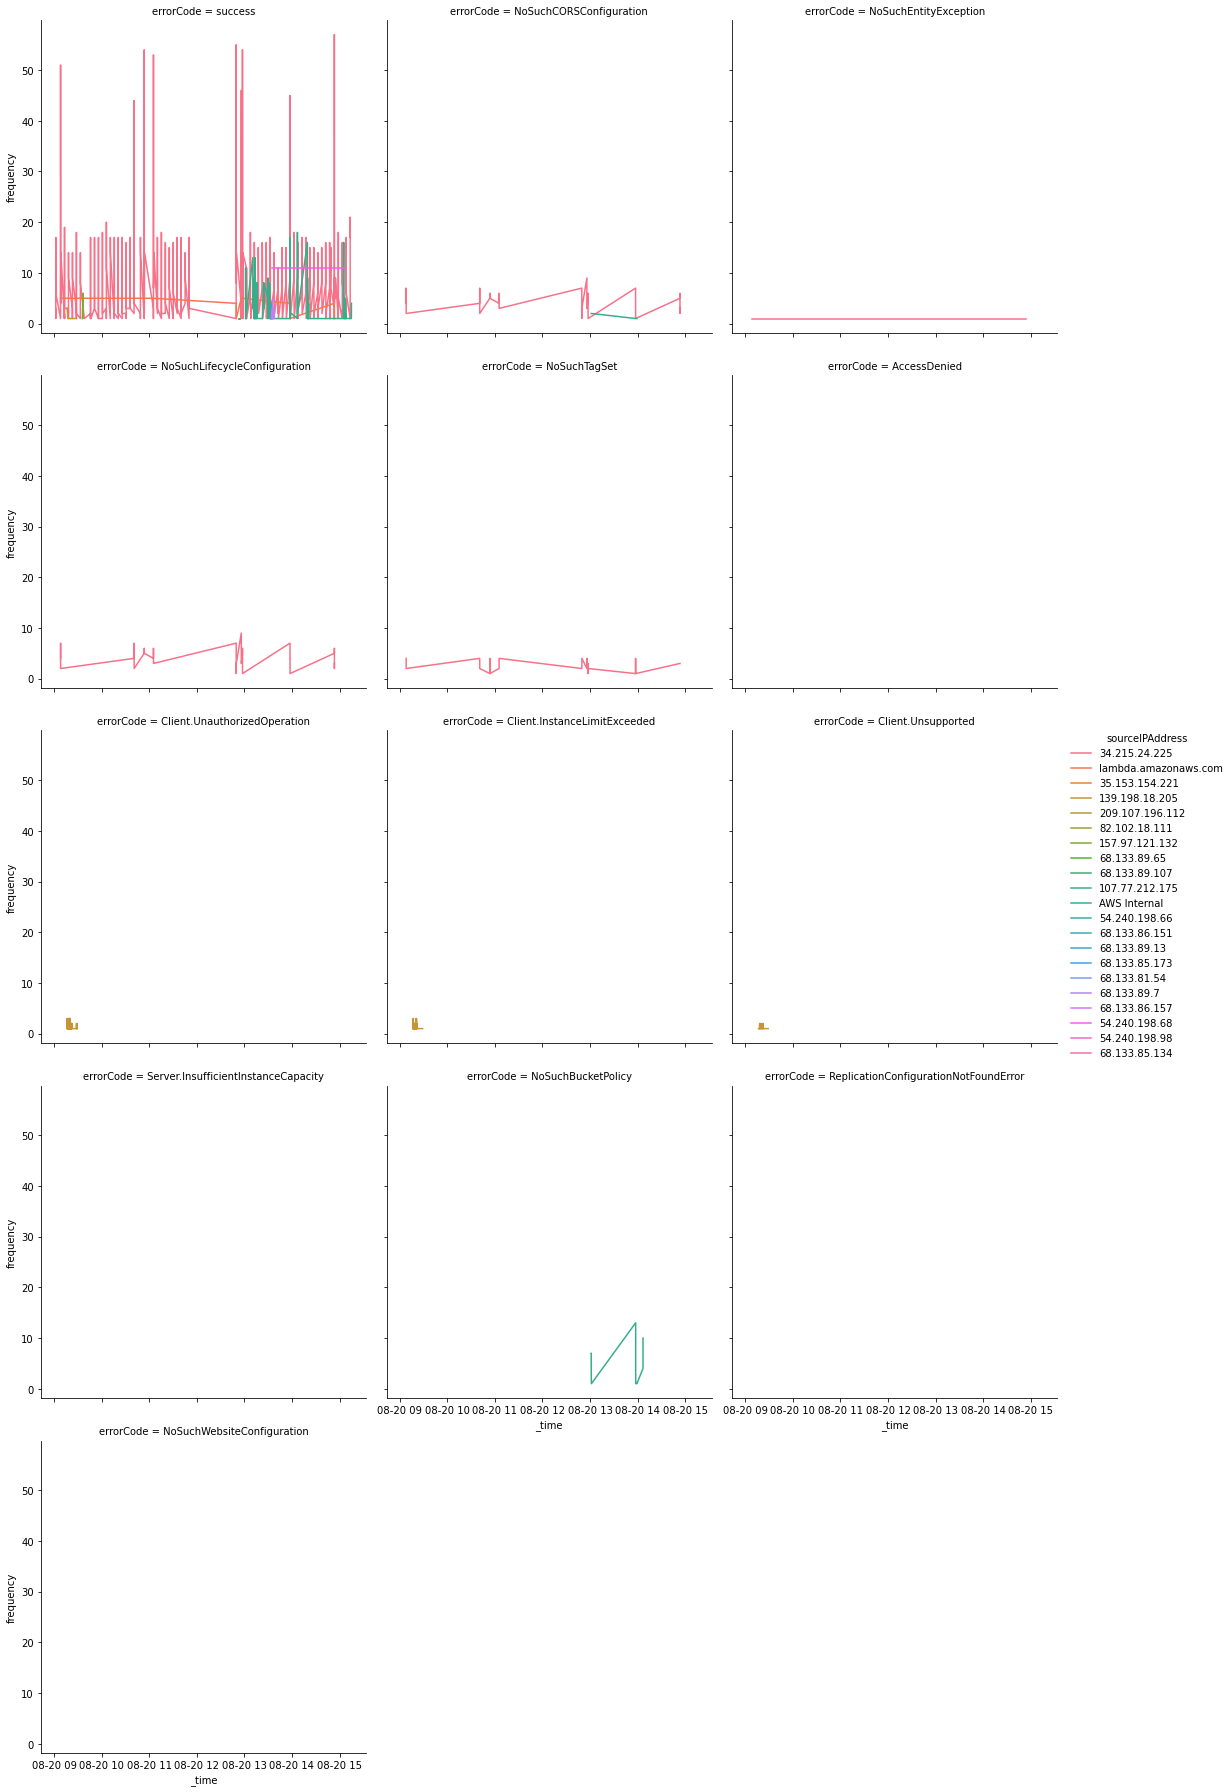

In [84]:
# Create an instance of a FacetGrid with each facet being a different errorCode and each line a different sourceIPAddress
ip_plot = sns.FacetGrid(df_freq_reindexed, col='errorCode', hue="sourceIPAddress", height=5, col_wrap=3)

# Plot each as a lineplot with x: time, y: freqency
ip_plot.map_dataframe(sns.lineplot, "_time", "frequency")

# Add the lengend
ip_plot.add_legend()

plt.show()